In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('energydata_complete_filtered.csv')

In [3]:
data.date[0]

'1/11/16 17:00'

In [4]:
data.index = data['date']

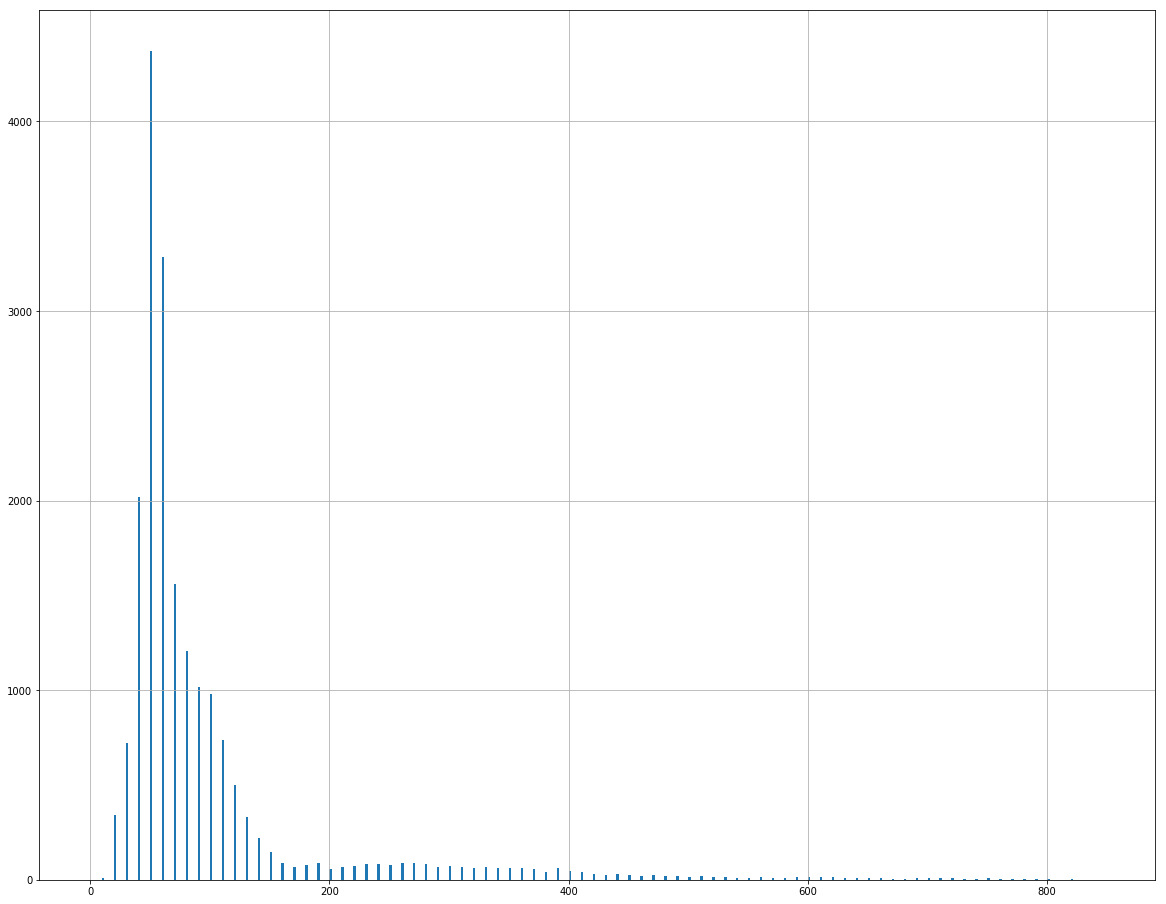

In [5]:
plt.figure(figsize=(20,16))
data.Appliances.hist(bins = range(0,850,2))
plt.show()

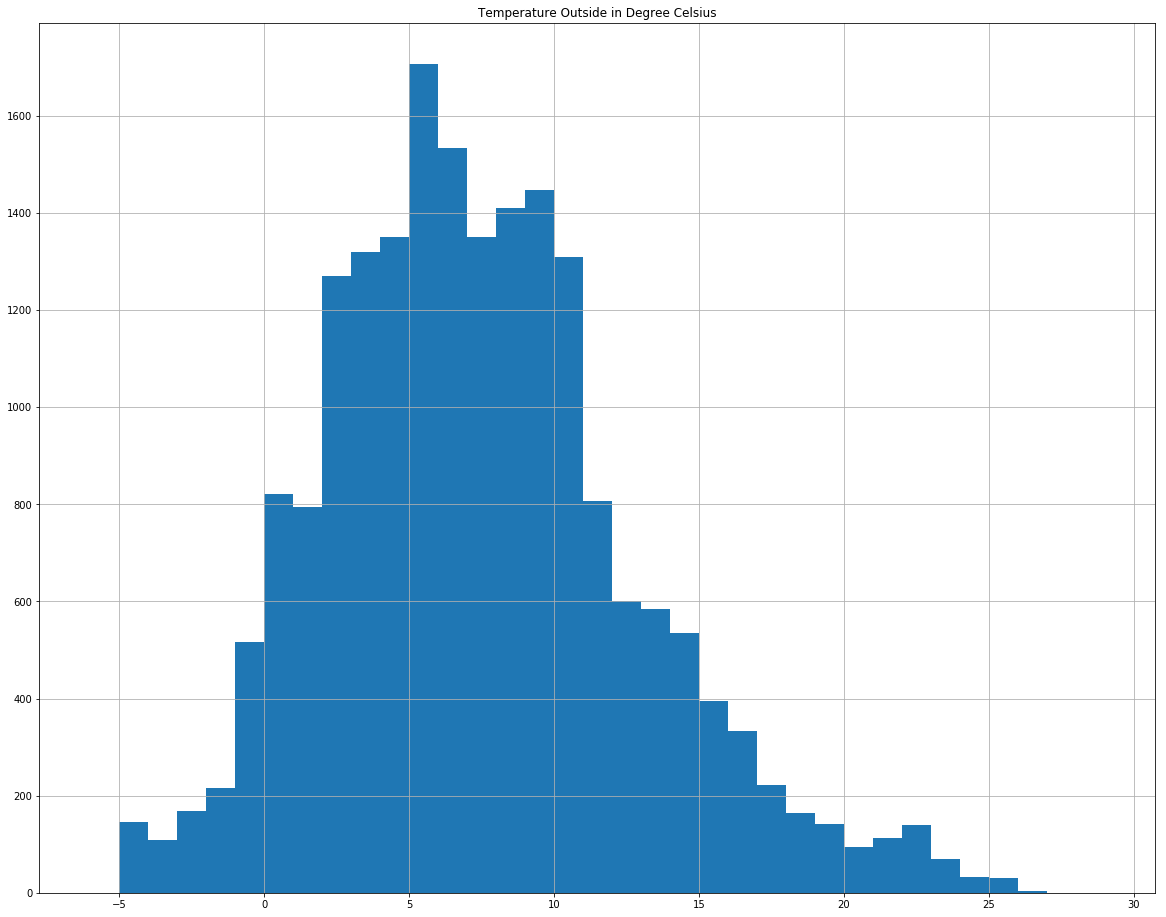

In [6]:
plt.figure(figsize=(20,16))
data['T_out'].hist(bins = range(-6,30,1))
plt.title('Temperature Outside in Degree Celsius')
plt.show()

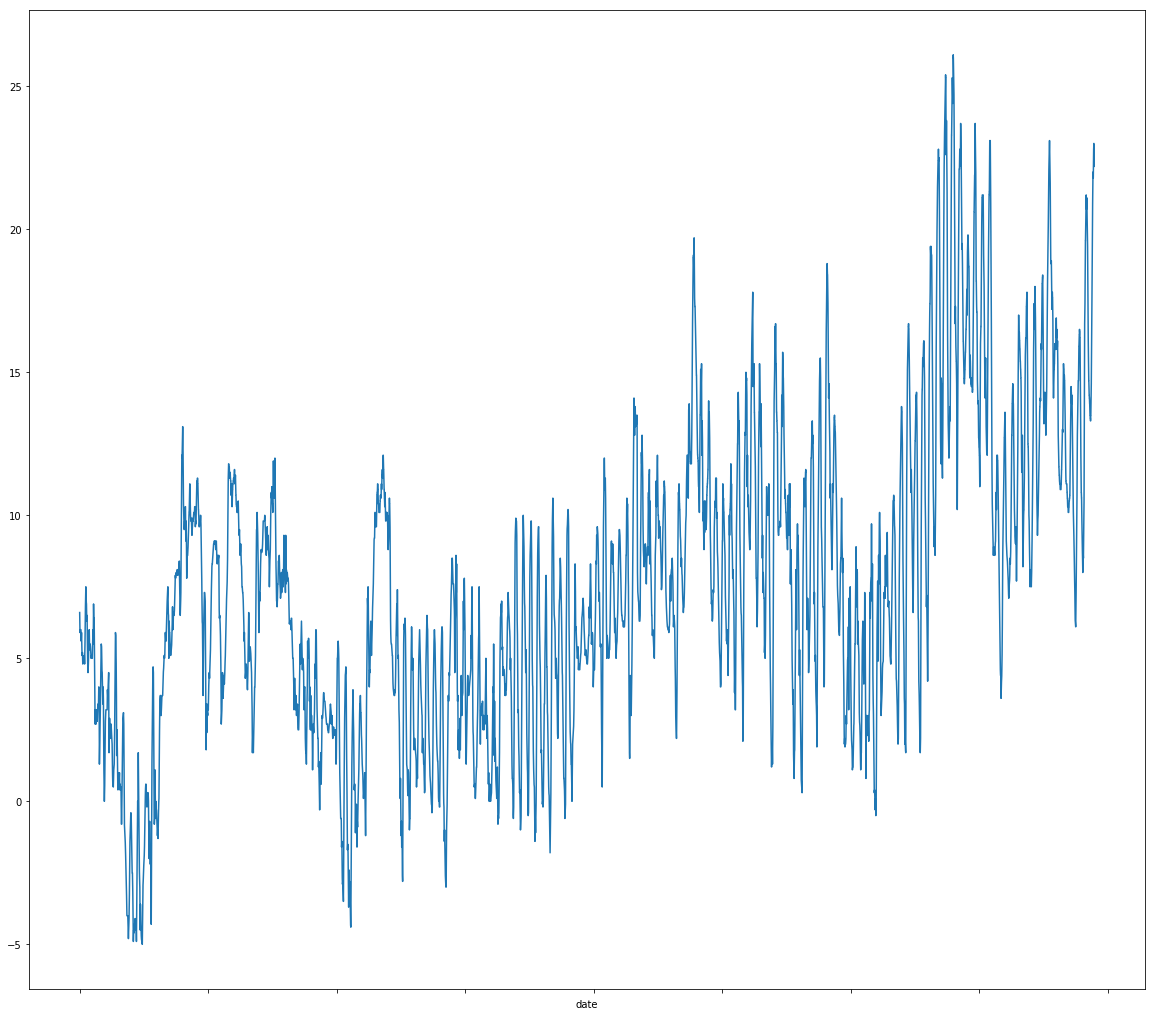

In [7]:
data['T_out'].plot(figsize=(20,18))
plt.show()

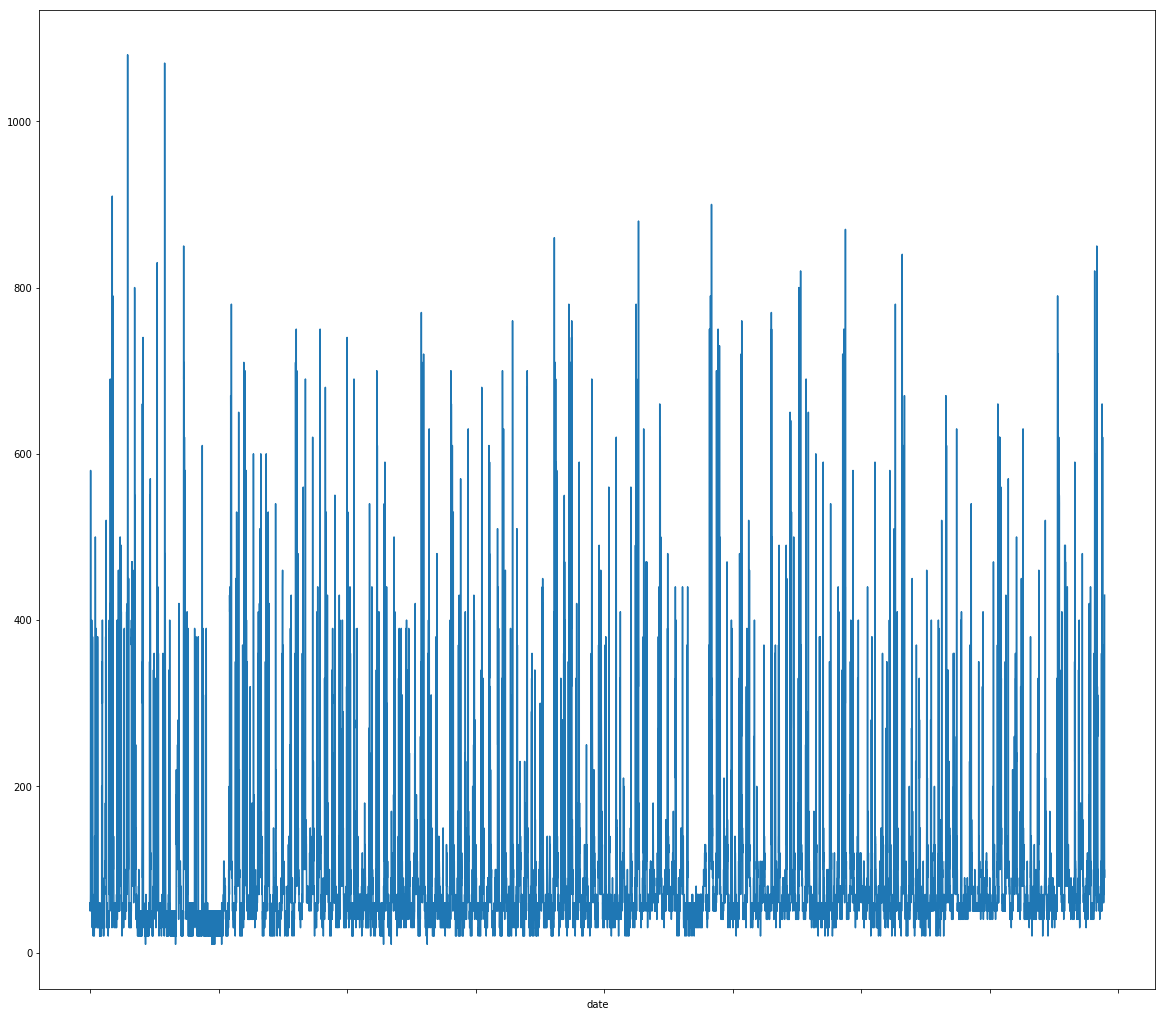

In [8]:
data.Appliances.plot(figsize=(20,18))
plt.show()

In [9]:
data['date']=data['date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format = True))

In [10]:
mask1 = (data['date'] > pd.to_datetime('2016-01-12 00:00:00', infer_datetime_format=True)) & (data['date']<pd.to_datetime('2016-01-30 23:00:00', infer_datetime_format=True))

In [11]:
data_12_01 = data[mask1]

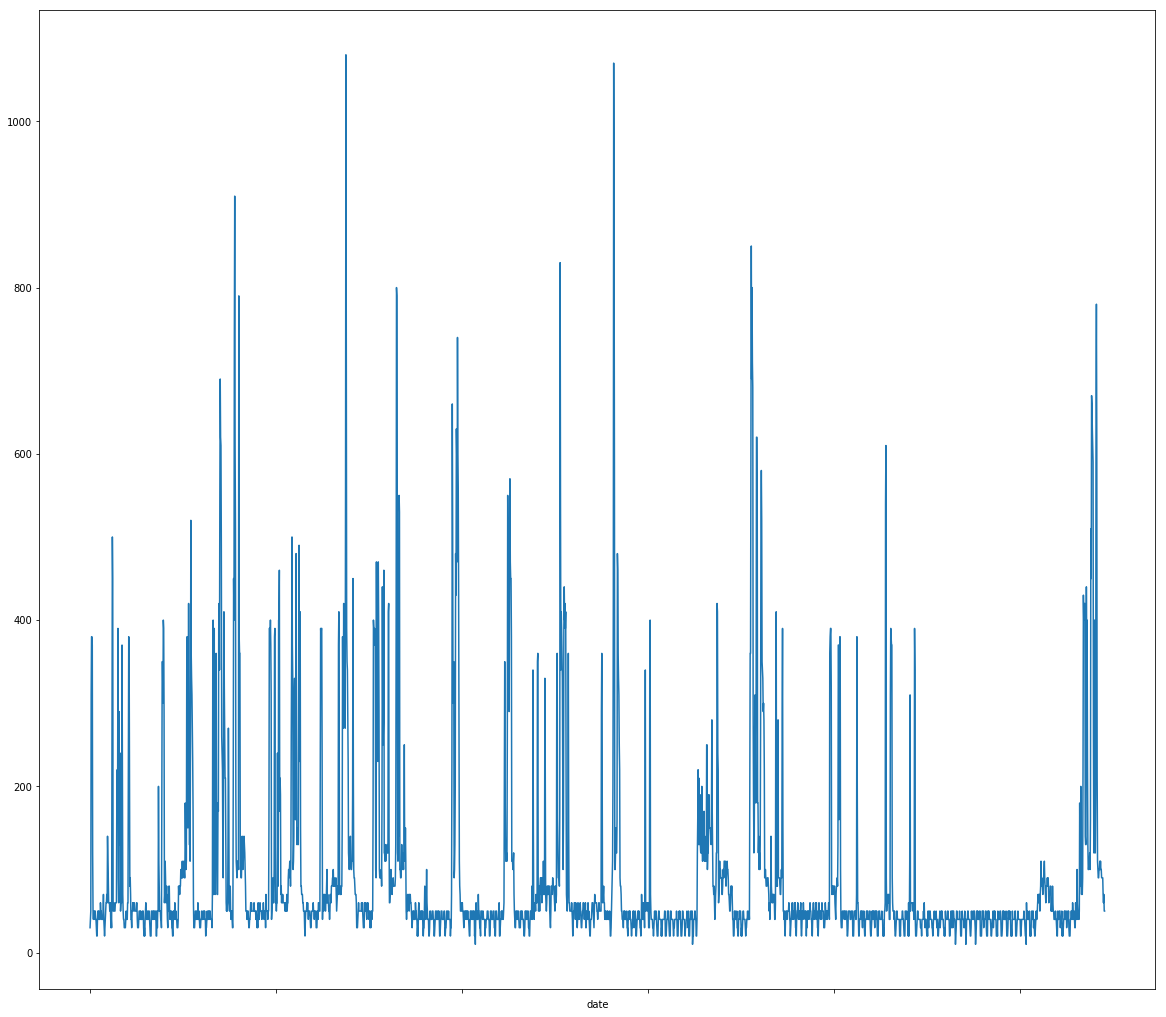

In [12]:
data_12_01.Appliances.plot(figsize=(20,18))
plt.show()

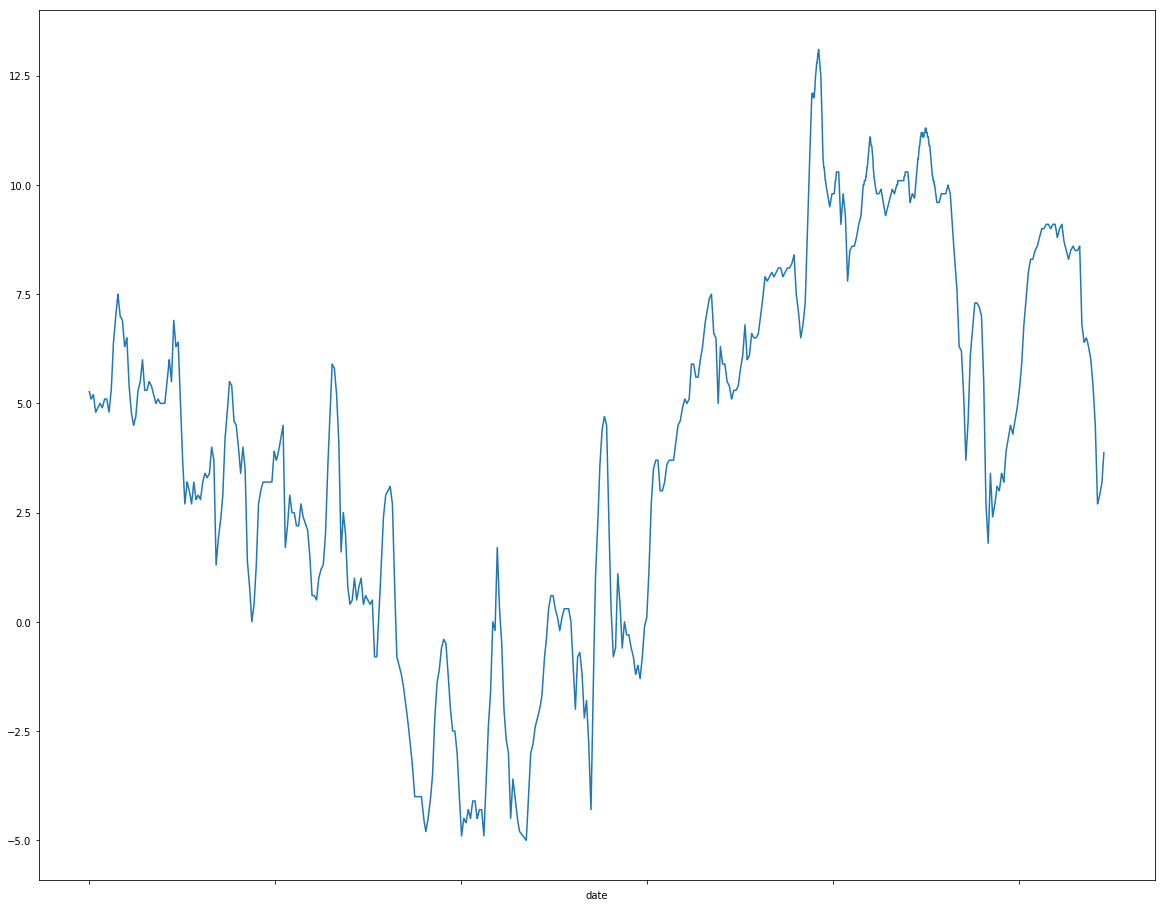

In [13]:
data_12_01['T_out'].plot(figsize=(20,16))
plt.show()

In [14]:
data_12_01.columns

Index(['date', 'Appliances', 'lights', 'T_Kitchen', 'RH_Kitchen', 'T_Living',
       'RH_Living', 'T_Laundry', 'RH_Laundry', 'T_Bathroom', 'RH_Bathroom',
       'T_Bedroom', 'RH_Bedroom', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

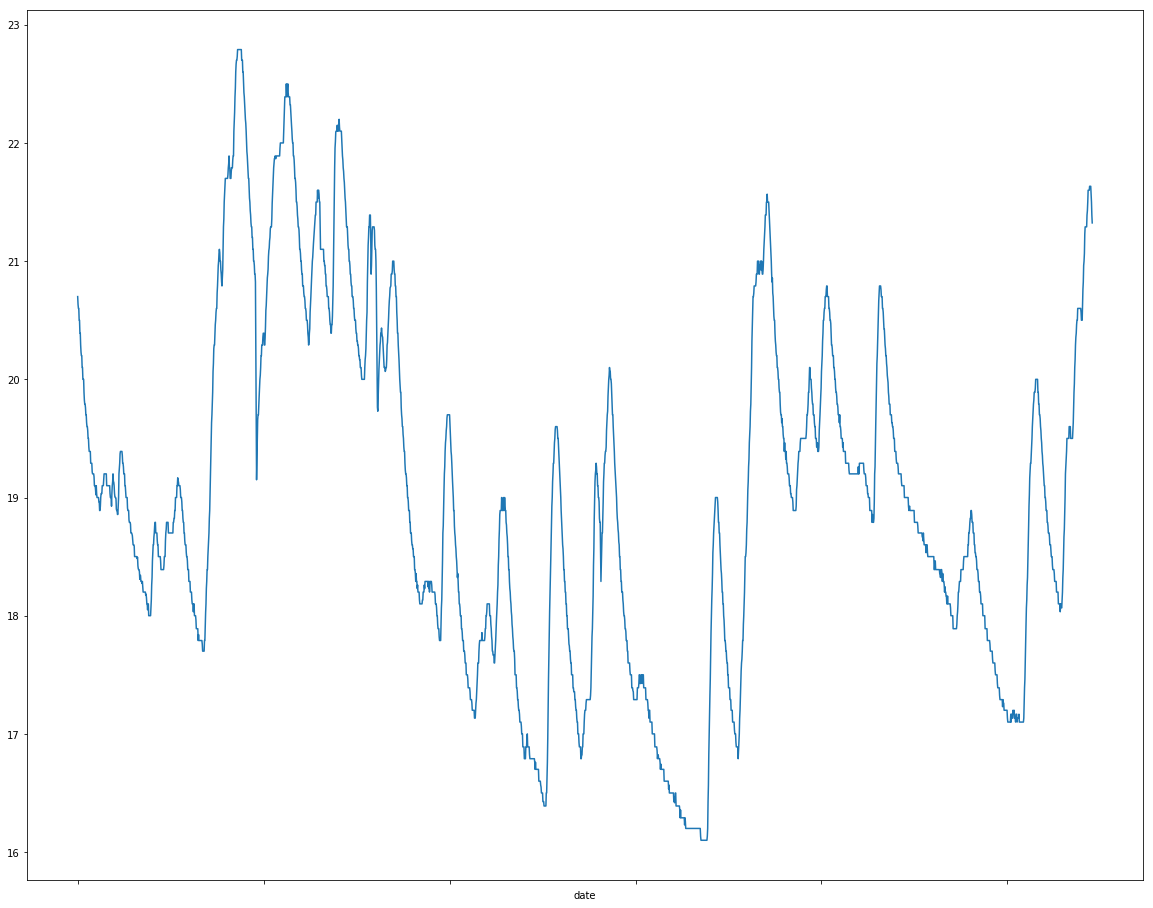

In [15]:
data_12_01['T_Living'].plot(figsize=(20,16))
plt.show()

In [16]:
data_12_01['T_living_out'] = data_12_01['T_out']-data_12_01['T_Living']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


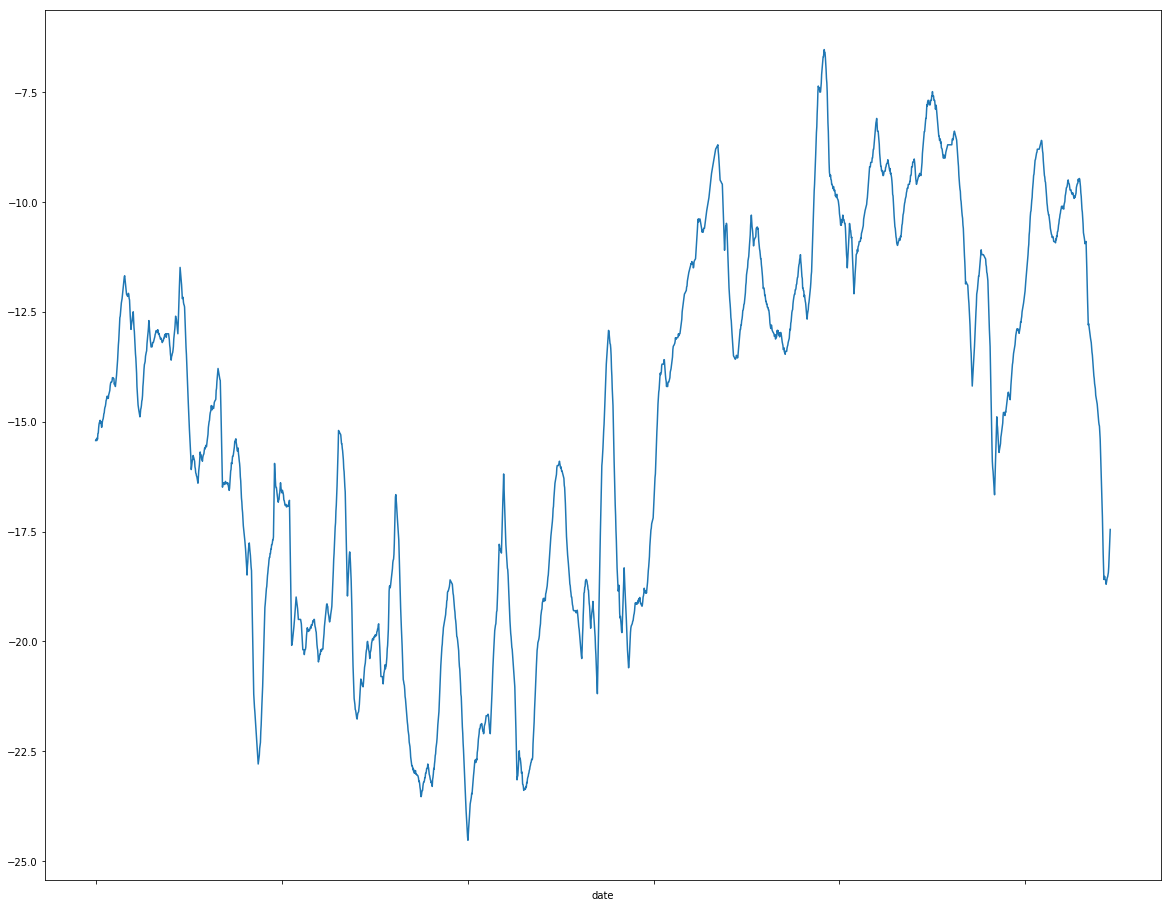

In [17]:
data_12_01['T_living_out'].plot(figsize=(20,16))
plt.show()

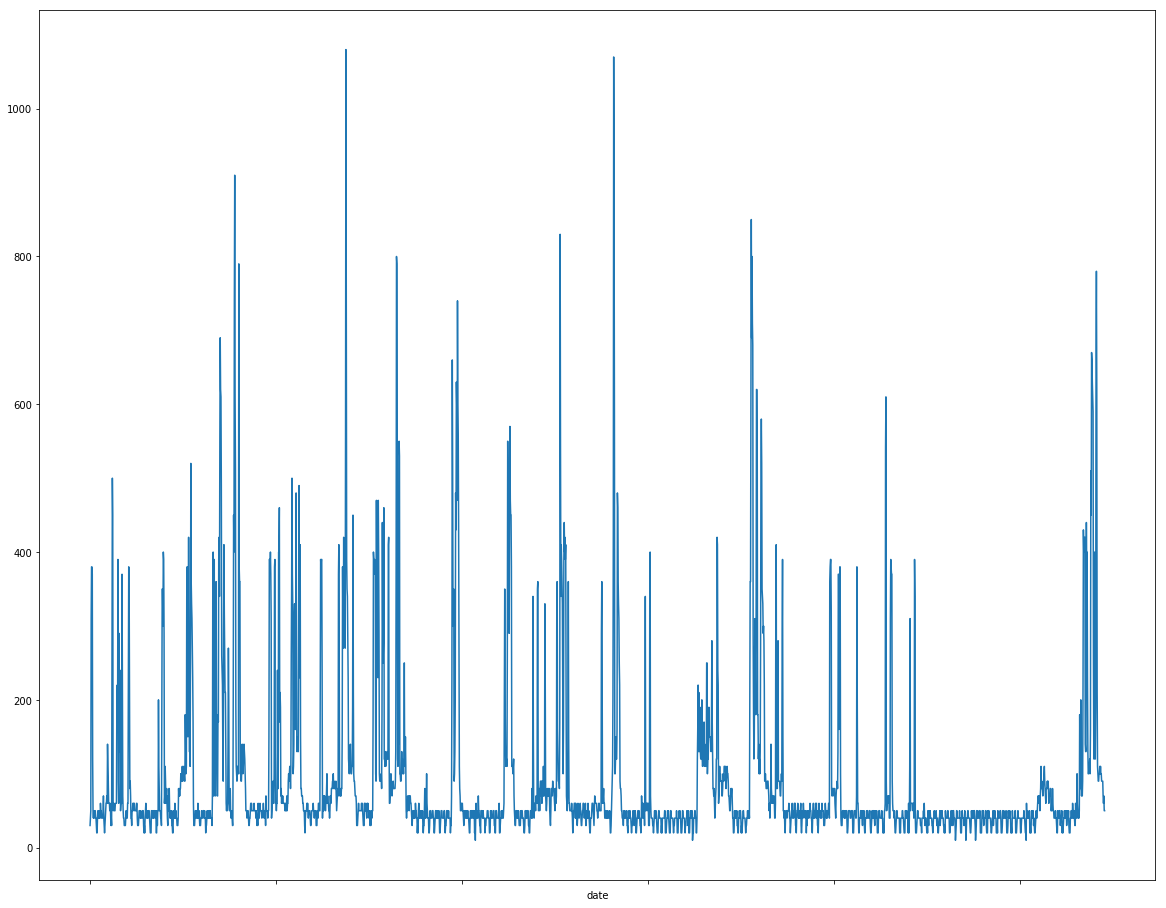

In [18]:
data_12_01['Appliances'].plot(figsize=(20,16))
plt.show()

In [19]:
data_12_01[['T_living_out','Appliances']].corr()


,T_living_out,Appliances
T_living_out,1.000000,-0.122266
Appliances,-0.122266,1.000000


In [20]:
data_12_01.corr()

,Appliances,lights,T_Kitchen,RH_Kitchen,T_Living,RH_Living,T_Laundry,RH_Laundry,T_Bathroom,RH_Bathroom,...,RH_Bedroom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,T_living_out
Appliances,1.000000,0.476595,0.117970,-0.021286,0.137012,-0.149878,0.119932,0.023168,0.082042,0.136739,...,-0.121550,-0.077830,-0.027513,0.047545,-0.070209,0.057267,-0.056256,0.007204,0.007204,-0.122266
lights,0.476595,1.000000,0.148057,0.000508,0.155622,-0.100172,0.109524,0.037289,0.122395,0.180679,...,-0.128095,-0.076987,0.051335,0.124228,-0.089334,0.090775,-0.027926,-0.010023,-0.010023,-0.127809
T_Kitchen,0.117970,0.148057,1.000000,-0.130886,0.979911,-0.277308,0.878291,0.168452,0.823398,0.161735,...,0.144719,-0.033200,-0.176371,-0.055507,0.059384,-0.022804,-0.053417,-0.008314,-0.008314,-0.367062
RH_Kitchen,-0.021286,0.000508,-0.130886,1.000000,-0.043818,0.920128,0.073121,0.817454,-0.088592,0.085160,...,0.655788,0.668054,-0.170574,0.166584,0.437223,-0.179759,0.712749,0.015697,0.015697,0.662537
T_Living,0.137012,0.155622,0.979911,-0.043818,1.000000,-0.206454,0.874654,0.274772,0.799347,0.150706,...,0.241960,0.085102,-0.193835,-0.026960,0.143383,-0.033275,0.071820,-0.007061,-0.007061,-0.259254
RH_Living,-0.149878,-0.100172,-0.277308,0.920128,-0.206454,1.000000,-0.070565,0.760335,-0.184969,0.087375,...,0.662040,0.675409,-0.098046,0.175126,0.442706,-0.183145,0.722679,0.007071,0.007071,0.725246
T_Laundry,0.119932,0.109524,0.878291,0.073121,0.874654,-0.070565,1.000000,0.373189,0.744505,0.190141,...,0.282171,0.075756,-0.286789,-0.071916,0.157832,-0.070921,0.049078,0.012067,0.012067,-0.225478
RH_Laundry,0.023168,0.037289,0.168452,0.817454,0.274772,0.760335,0.373189,1.000000,0.118325,0.162762,...,0.794144,0.680674,-0.229747,0.197835,0.459473,-0.154624,0.735123,0.009323,0.009323,0.565893
T_Bathroom,0.082042,0.122395,0.823398,-0.088592,0.799347,-0.184969,0.744505,0.118325,1.000000,0.267508,...,0.088453,-0.069317,-0.221664,-0.059814,-0.011372,-0.001326,-0.090659,-0.003463,-0.003463,-0.340364
RH_Bathroom,0.136739,0.180679,0.161735,0.085160,0.150706,0.087375,0.190141,0.162762,0.267508,1.000000,...,0.042629,-0.106184,-0.120243,0.120370,0.015363,-0.025850,-0.053172,-0.013042,-0.013042,-0.154430


In [21]:
def diff(column1, column2, name):
    data_12_01[name]=abs(data_12_01[column1])-data_12_01[column2]

In [22]:
diff('RH_Bedroom','RH_out','RH_bedroom_out')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
data_12_01['Appliances_Sqrt'] = data_12_01['Appliances'].apply(lambda x: np.sqrt(x) )

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
data_12_01


,date,Appliances,lights,T_Kitchen,RH_Kitchen,T_Living,RH_Living,T_Laundry,RH_Laundry,T_Bathroom,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,T_living_out,RH_bedroom_out,Appliances_Sqrt
date,,,,,,,,,,,,,,,,,,,,,
1/12/16 0:10,2016-01-12 00:10:00,30,20,21.290000,44.826667,20.700000,44.000000,20.200000,45.590000,19.200000,...,737.000000,92.000000,6.000000,25.000000,4.070,27.651816,27.651816,-15.430000,-46.210000,5.477226
1/12/16 0:20,2016-01-12 00:20:00,40,20,21.290000,44.966667,20.633333,44.000000,20.166667,45.500000,19.200000,...,737.100000,92.000000,6.000000,28.000000,4.030,26.485979,26.485979,-15.403333,-46.136667,6.324555
1/12/16 0:30,2016-01-12 00:30:00,50,20,21.260000,45.090000,20.600000,44.030000,20.100000,45.500000,19.166667,...,737.200000,92.000000,6.000000,31.000000,4.000,39.467812,39.467812,-15.400000,-46.100000,7.071068
1/12/16 0:40,2016-01-12 00:40:00,310,10,21.200000,45.090000,20.600000,44.090000,20.100000,45.500000,19.100000,...,737.300000,92.000000,6.000000,34.000000,3.970,1.166560,1.166560,-15.430000,-46.033333,17.606817
1/12/16 0:50,2016-01-12 00:50:00,380,20,21.166667,45.230000,20.500000,44.126667,20.100000,45.500000,19.066667,...,737.400000,92.000000,6.000000,37.000000,3.930,23.861503,23.861503,-15.370000,-45.970000,19.493589
1/12/16 1:00,2016-01-12 01:00:00,380,20,21.075000,45.372500,20.500000,44.200000,20.100000,45.530000,19.000000,...,737.500000,92.000000,6.000000,40.000000,3.900,36.615687,36.615687,-15.400000,-45.910000,19.493589
1/12/16 1:10,2016-01-12 01:10:00,370,20,21.000000,45.400000,20.390000,44.200000,20.100000,45.590000,19.000000,...,737.633333,92.000000,5.833333,40.000000,3.920,34.636578,34.636578,-15.270000,-45.800000,19.235384
1/12/16 1:20,2016-01-12 01:20:00,120,10,21.000000,45.590000,20.390000,44.260000,20.100000,45.590000,19.000000,...,737.766667,92.000000,5.666667,40.000000,3.930,23.880981,23.880981,-15.260000,-45.800000,10.954451
1/12/16 1:30,2016-01-12 01:30:00,50,0,20.926667,45.590000,20.290000,44.290000,20.166667,45.530000,19.000000,...,737.900000,92.000000,5.500000,40.000000,3.950,43.060474,43.060474,-15.140000,-45.710000,7.071068


In [25]:
index = range(0, len(data_12_01))

In [26]:
data_12_01['Index'] = index

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
data_12_01.corr()

,Appliances,lights,T_Kitchen,RH_Kitchen,T_Living,RH_Living,T_Laundry,RH_Laundry,T_Bathroom,RH_Bathroom,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,T_living_out,RH_bedroom_out,Appliances_Sqrt,Index
Appliances,1.000000,0.476595,0.117970,-0.021286,0.137012,-0.149878,0.119932,0.023168,0.082042,0.136739,...,0.047545,-0.070209,0.057267,-0.056256,0.007204,0.007204,-0.122266,-0.102084,0.975510,-0.122015
lights,0.476595,1.000000,0.148057,0.000508,0.155622,-0.100172,0.109524,0.037289,0.122395,0.180679,...,0.124228,-0.089334,0.090775,-0.027926,-0.010023,-0.010023,-0.127809,-0.181885,0.530407,-0.141843
T_Kitchen,0.117970,0.148057,1.000000,-0.130886,0.979911,-0.277308,0.878291,0.168452,0.823398,0.161735,...,-0.055507,0.059384,-0.022804,-0.053417,-0.008314,-0.008314,-0.367062,0.120440,0.153260,-0.293167
RH_Kitchen,-0.021286,0.000508,-0.130886,1.000000,-0.043818,0.920128,0.073121,0.817454,-0.088592,0.085160,...,0.166584,0.437223,-0.179759,0.712749,0.015697,0.015697,0.662537,0.126634,-0.033927,0.406070
T_Living,0.137012,0.155622,0.979911,-0.043818,1.000000,-0.206454,0.874654,0.274772,0.799347,0.150706,...,-0.026960,0.143383,-0.033275,0.071820,-0.007061,-0.007061,-0.259254,0.135362,0.175855,-0.250401
RH_Living,-0.149878,-0.100172,-0.277308,0.920128,-0.206454,1.000000,-0.070565,0.760335,-0.184969,0.087375,...,0.175126,0.442706,-0.183145,0.722679,0.007071,0.007071,0.725246,0.120871,-0.176856,0.501158
T_Laundry,0.119932,0.109524,0.878291,0.073121,0.874654,-0.070565,1.000000,0.373189,0.744505,0.190141,...,-0.071916,0.157832,-0.070921,0.049078,0.012067,0.012067,-0.225478,0.198431,0.142119,-0.218744
RH_Laundry,0.023168,0.037289,0.168452,0.817454,0.274772,0.760335,0.373189,1.000000,0.118325,0.162762,...,0.197835,0.459473,-0.154624,0.735123,0.009323,0.009323,0.565893,0.157255,0.019623,0.268919
T_Bathroom,0.082042,0.122395,0.823398,-0.088592,0.799347,-0.184969,0.744505,0.118325,1.000000,0.267508,...,-0.059814,-0.011372,-0.001326,-0.090659,-0.003463,-0.003463,-0.340364,0.099564,0.114540,-0.343863
RH_Bathroom,0.136739,0.180679,0.161735,0.085160,0.150706,0.087375,0.190141,0.162762,0.267508,1.000000,...,0.120370,0.015363,-0.025850,-0.053172,-0.013042,-0.013042,-0.154430,-0.101577,0.157842,-0.061922


In [28]:
data_12_01.index = data_12_01['Index']

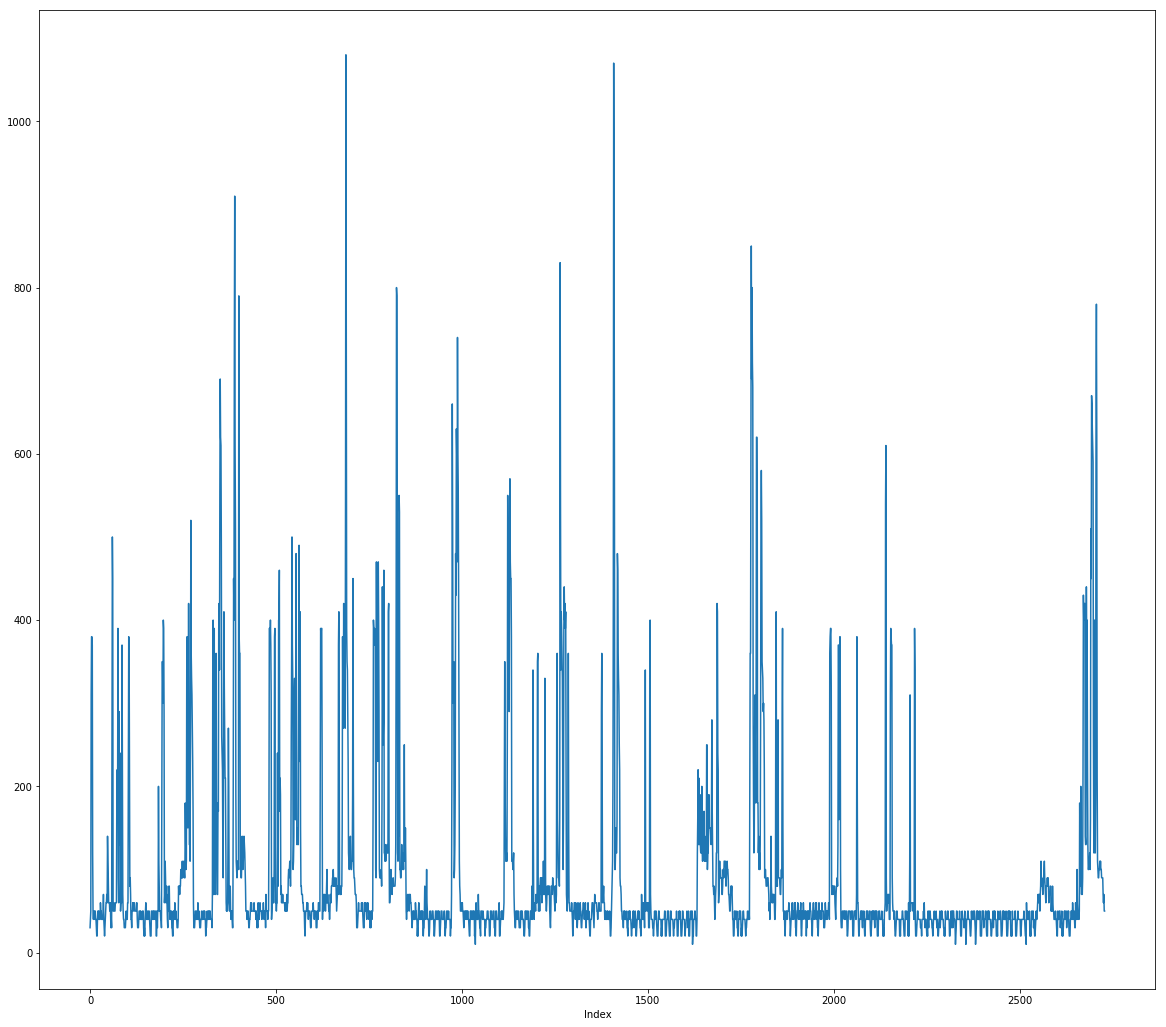

In [29]:
data_12_01['Appliances'].plot(figsize=(20,18))
plt.show()

In [30]:
def plot_data(start_date, end_date, data, attr = 'Appliances'):
    mask1 = (data['date'] > pd.to_datetime(start_date, infer_datetime_format=True)) & (data['date']<pd.to_datetime(end_date, infer_datetime_format=True))
    data_new=data[mask1]
    data_new.index = list(range(0, len(data_new)))
    data_new[attr].plot(figsize=(20,18))
    plt.show()

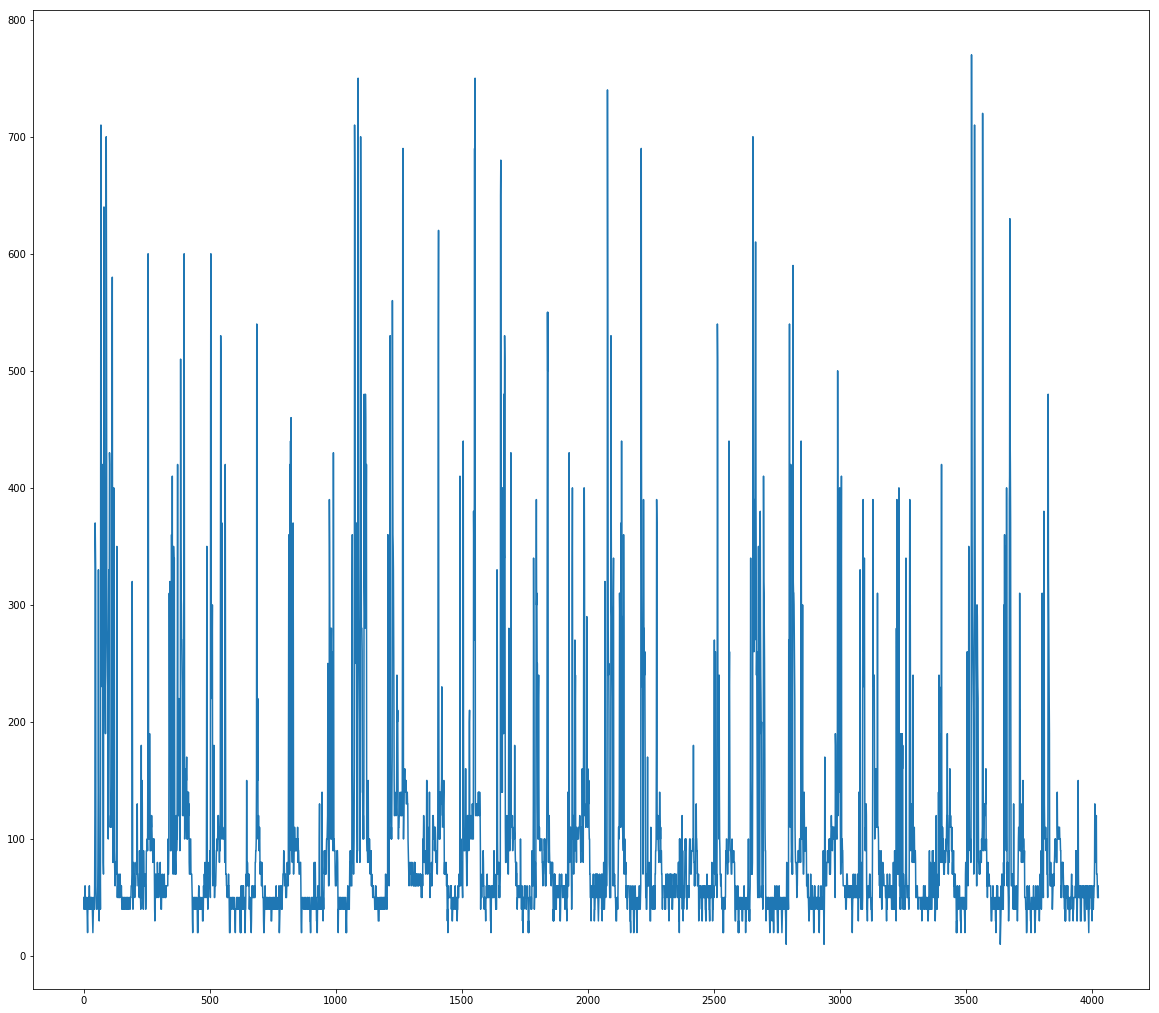

In [31]:
plot_data(start_date="2016-02-01 00:00:00", end_date="2016-02-28 23:00:00", data=data)

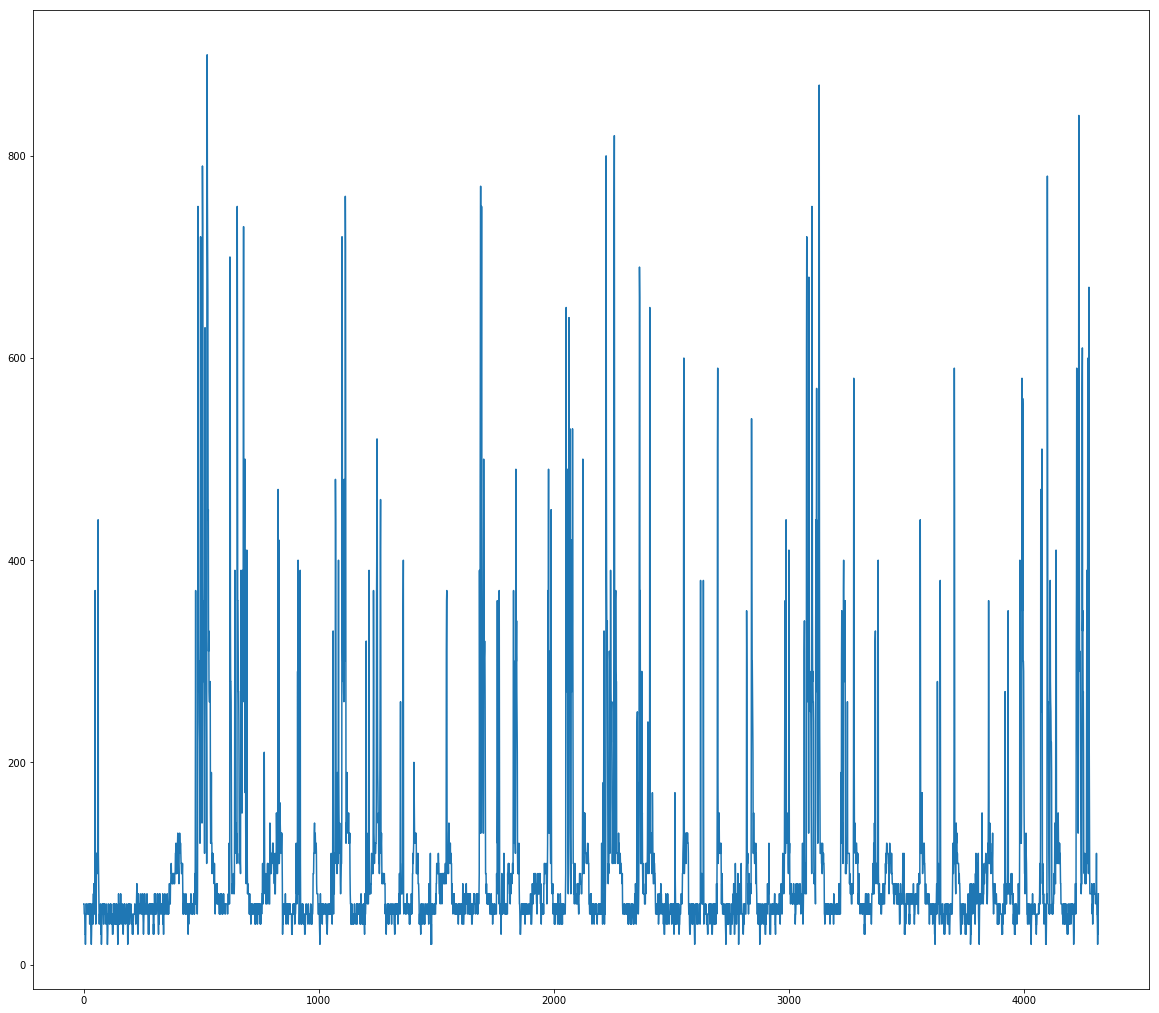

In [32]:
plot_data("2016-04-01 00:00:00",'2016-05-01 00:00:00', data=data)

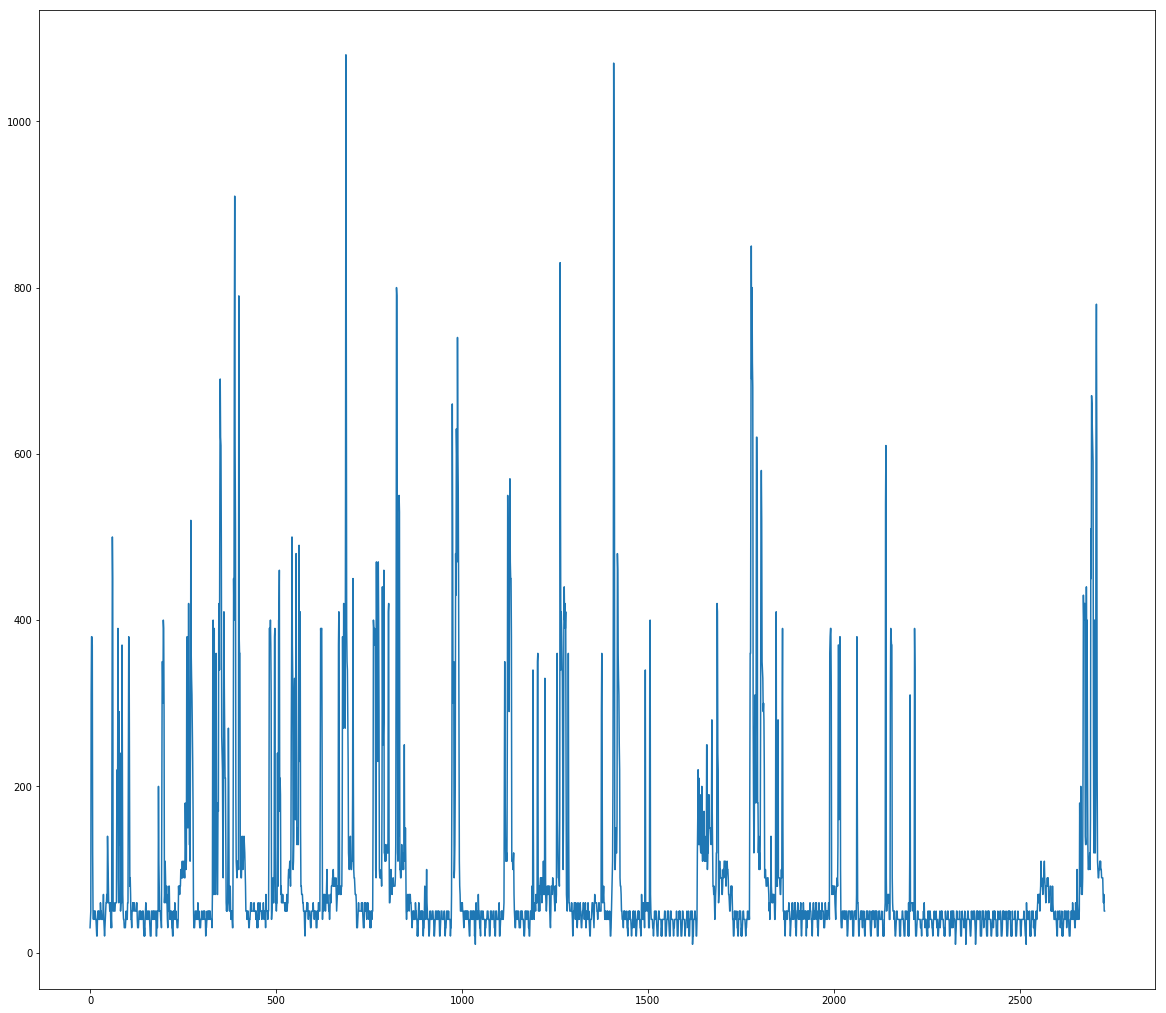

In [33]:
plot_data("2016-01-12 00:00:00",'2016-01-30 23:00:00', data=data)

In [34]:
mask2 = (data['date'] > pd.to_datetime('2016-03-01 00:00:00', infer_datetime_format=True)) & (data['date']<pd.to_datetime('2016-04-30 23:00:00', infer_datetime_format=True))

In [35]:
data_april_march = data[mask2]

In [36]:
data_april_march.corr()

,Appliances,lights,T_Kitchen,RH_Kitchen,T_Living,RH_Living,T_Laundry,RH_Laundry,T_Bathroom,RH_Bathroom,T_Bedroom,RH_Bedroom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.115817,0.103269,0.162867,0.186314,-0.044016,0.179577,0.083408,0.044258,0.004538,0.059497,-0.031574,0.192356,-0.028288,-0.219201,0.137191,-0.029765,0.057436,-0.003941,-0.003941
lights,0.115817,1.000000,0.025941,0.034666,0.012800,-0.011184,-0.080245,-0.030720,-0.044303,0.083596,-0.093733,-0.147276,-0.017355,0.011864,-0.034422,-0.008032,-0.020541,-0.053013,0.007043,0.007043
T_Kitchen,0.103269,0.025941,1.000000,0.293084,0.704158,0.071346,0.734279,0.226964,0.724672,0.082998,0.683693,0.120497,0.549683,0.018711,-0.324116,0.077754,-0.038480,0.441207,-0.010362,-0.010362
RH_Kitchen,0.162867,0.034666,0.293084,1.000000,0.292727,0.731722,0.460269,0.785613,0.466081,0.185012,0.422062,0.555106,0.421526,-0.426253,0.068652,0.051706,-0.086256,0.669285,-0.000452,-0.000452
T_Living,0.186314,0.012800,0.704158,0.292727,1.000000,-0.290052,0.498982,0.185304,0.515518,-0.002286,0.532134,0.005606,0.787598,-0.038344,-0.635338,0.243582,-0.072388,0.465441,-0.005353,-0.005353
RH_Living,-0.044016,-0.011184,0.071346,0.731722,-0.290052,1.000000,0.308737,0.662402,0.336624,0.196295,0.287103,0.623647,-0.043809,-0.331837,0.528817,-0.147403,-0.028408,0.474566,0.004490,0.004490
T_Laundry,0.179577,-0.080245,0.734279,0.460269,0.498982,0.308737,1.000000,0.363186,0.782768,0.059831,0.758952,0.316384,0.493792,-0.131560,-0.181799,0.073376,-0.138707,0.508652,-0.002751,-0.002751
RH_Laundry,0.083408,-0.030720,0.226964,0.785613,0.185304,0.662402,0.363186,1.000000,0.333573,0.192987,0.293044,0.682481,0.326900,-0.479790,0.136706,0.044041,-0.044215,0.589630,-0.004041,-0.004041
T_Bathroom,0.044258,-0.044303,0.724672,0.466081,0.515518,0.336624,0.782768,0.333573,1.000000,0.222690,0.858233,0.278321,0.512062,-0.132753,-0.145743,0.034131,-0.090210,0.561733,-0.004129,-0.004129
RH_Bathroom,0.004538,0.083596,0.082998,0.185012,-0.002286,0.196295,0.059831,0.192987,0.222690,1.000000,0.030368,0.078047,-0.026366,-0.131904,0.121127,-0.062410,-0.013923,0.095492,-0.026978,-0.026978
